# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


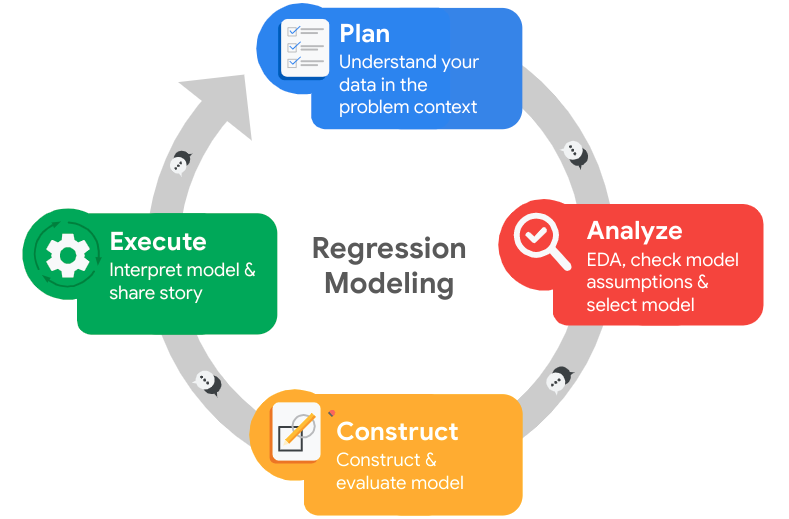

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

### Answer
- understand the business scenario and the problem
- Data exploration and data cleaning


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

from xgboost import plot_importance
from xgboost import XGBClassifier

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_comma_sep.csv")

# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df1 = df0.rename(columns={'average_montly_hours': 'average_monthly_hours',
                          'Work_accident': 'work_accident',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df1.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df1.duplicated().value_counts()

False    11991
True      3008
dtype: int64

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df1[df1.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df2 = df1.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

lower_threshold: 1.5
upper_threshold: 5.5


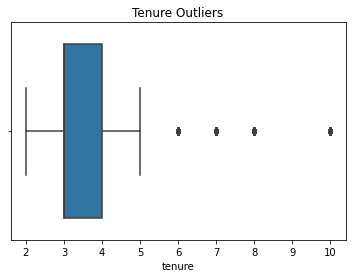

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

sns.boxplot(x=df2['tenure'])
plt.title('Tenure Outliers')

# Check the lower and upper threshold of outliers
q1 = df1['tenure'].quantile(0.25)
q3 = df1['tenure'].quantile(0.75)
iqr = q3-q1
upper_threshold = q3 + 1.5*iqr
lower_threshold = q1 - 1.5*iqr
print("lower_threshold:", lower_threshold)
print("upper_threshold:", upper_threshold)

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

sum((df2['tenure'] >= upper_threshold) | (df2['tenure'] <= lower_threshold))

824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

### Answer
- Check models and assumption, and select model

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print("left vs stayed(number)")
print(df2['left'].value_counts())

print("")

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print("left vs stayed(%)")
print(df2['left'].value_counts(normalize=True)*100)

left vs stayed(number)
0    10000
1     1991
Name: left, dtype: int64

left vs stayed(%)
0    83.39588
1    16.60412
Name: left, dtype: float64


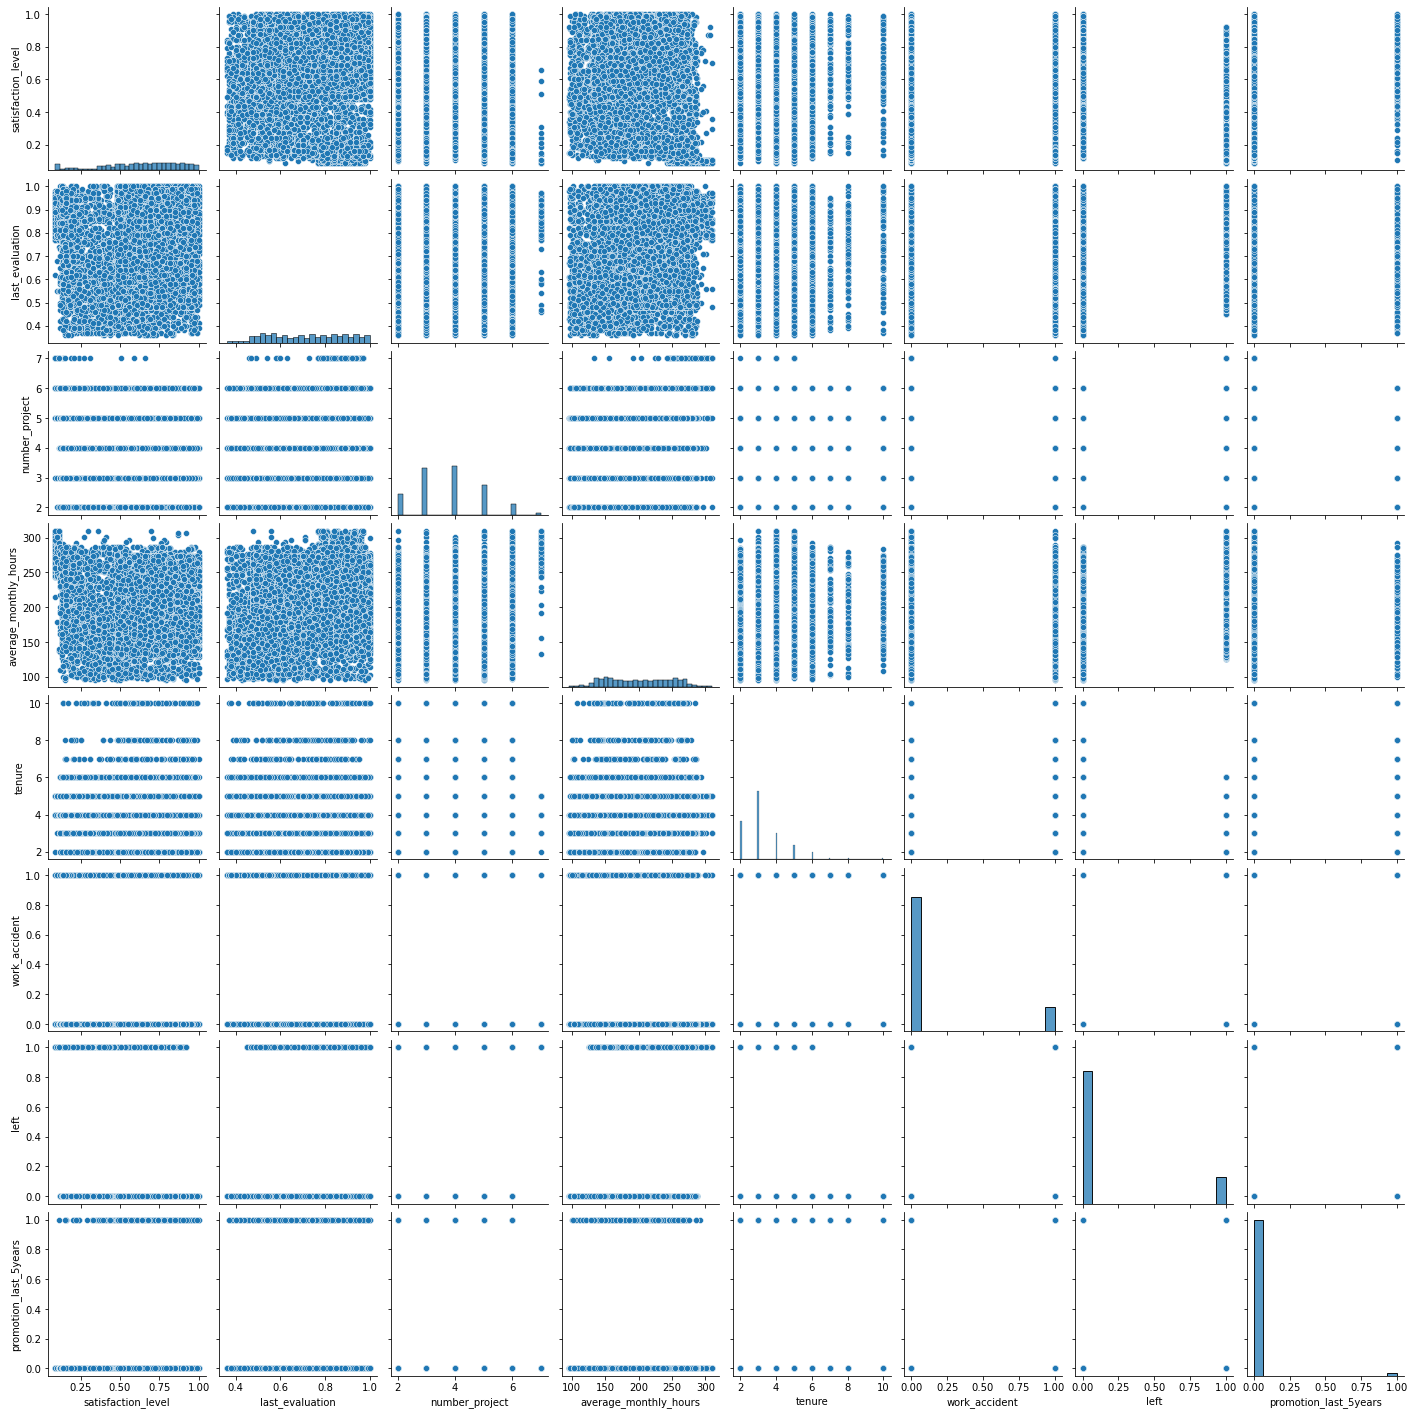

In [14]:
# Check pairplot
sns.pairplot(df2)

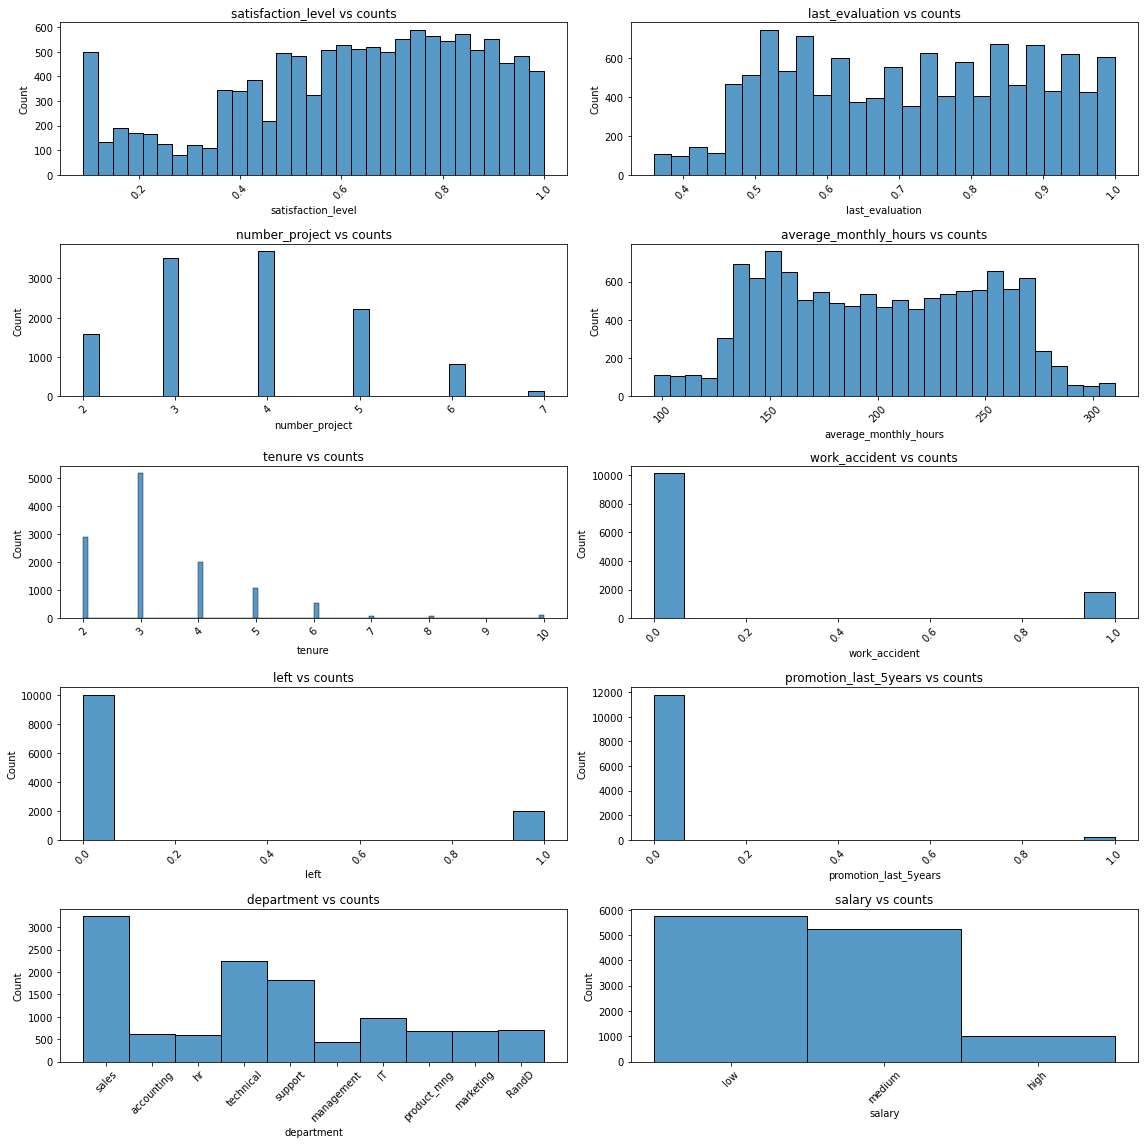

In [15]:
# Check the distribution by variables
fig, ax = plt.subplots(5 , 2, figsize=(16, 16))
i = 0
j = 0
for col in df2.columns:
    sns.histplot(data=df2, x=col, ax=ax[i,j])
    ax[i,j].xaxis.set_tick_params(rotation=45)
    ax[i,j].set_title(col + " vs counts")
    j+= 1
    if j >= 2:
        j = j % 2
        i += 1
fig.tight_layout()
plt.show()

Only less employees had a promotion in the last 5 years.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [16]:
# Defined boxplot and histplot 
def plot_data(data, x, y, hue, l_title, r_title):
    """
    Input:
        data: DataFrame
        x: variable of DataFrame
        y: variable of DataFrame
        hue: multiple plots by hue
        l_title: plot title on left graph
        r_title: plot title on right graph
    Output:
        show boxplot and histplot
    """
    
    fig, ax = plt.subplots(1 , 2, figsize=(16, 9))
    sns.boxplot(data=data, x=x, y=y, hue=hue, orient="h", ax=ax[0])
    ax[0].set_title(l_title)
    sns.histplot(data=data, x=y, hue=hue, multiple='dodge', shrink=5, ax=ax[1])
    ax[1].set_title(r_title)
    plt.show()

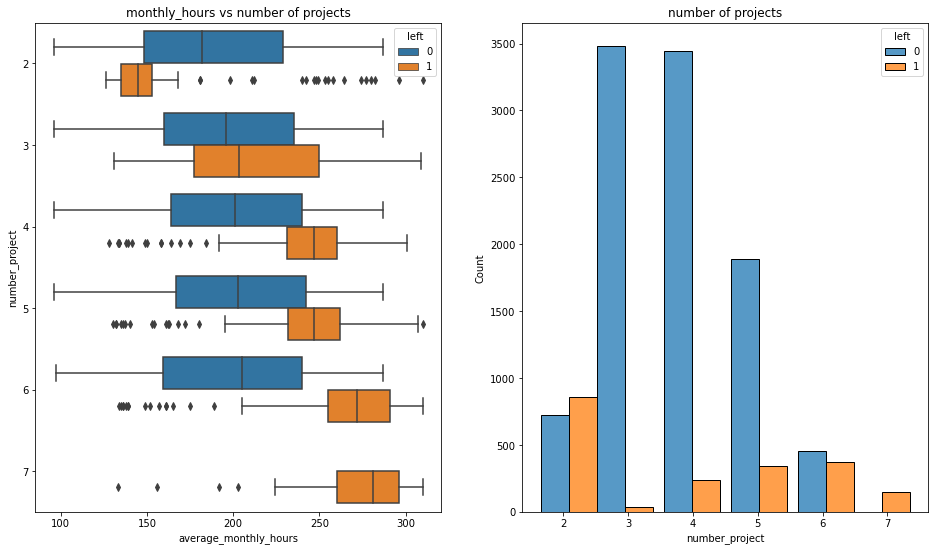

In [17]:
# Check corr of average_monthly hours vs number_project by left
### YOUR CODE HERE ###
plot_data(df2, 'average_monthly_hours', 'number_project', 'left', 'monthly_hours vs number of projects', 'number of projects')

Employees who had 7 projects had left. 

In [18]:
# Check numbers of left with number of prject at 7
df2[df2['number_project'] == 7]['left'].value_counts()

1    145
Name: left, dtype: int64

All 145 person who had 7 projects had left the company.

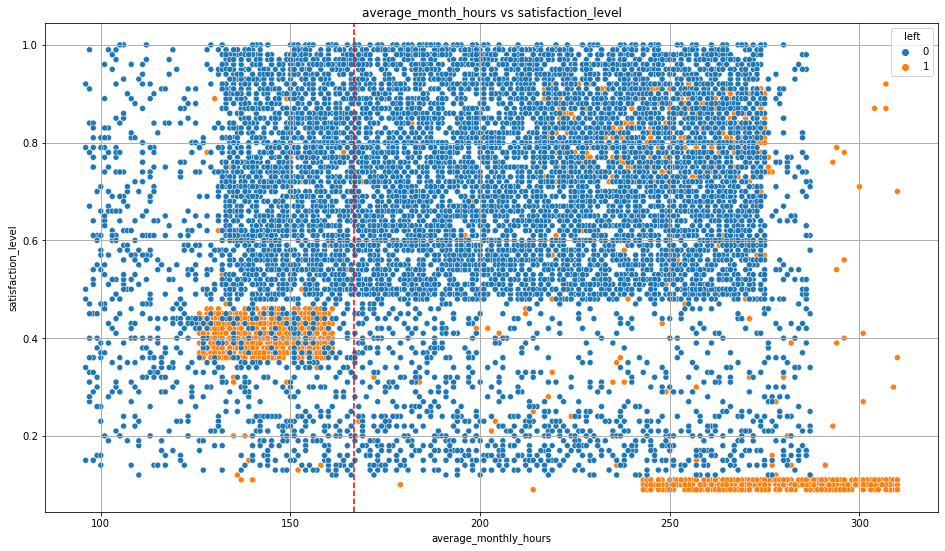

In [19]:
# Create scatter plot to check the corr of average mmonthly hours and satisfaction level
### YOUR CODE HERE ###
ave_hours = 50*40/12  # 50 weeks * 40 hours per week . 12 month
plt.figure(figsize=(16,9))
sns.scatterplot(data=df2, x='average_monthly_hours', y='satisfaction_level', hue='left')
plt.axvline(x=ave_hours, color='red', ls='--')
plt.title("average_month_hours vs satisfaction_level")
plt.grid(linestyle='-', linewidth=1)

There are two groups who had left company. Average monthly hours of 125-160 and satisfaction_level at 0.4 left. It may be the person decided to leave already or the person received the notification to be laid off. Average monthly hours of 245-320 may be overworking and it may be the reason to leave the company

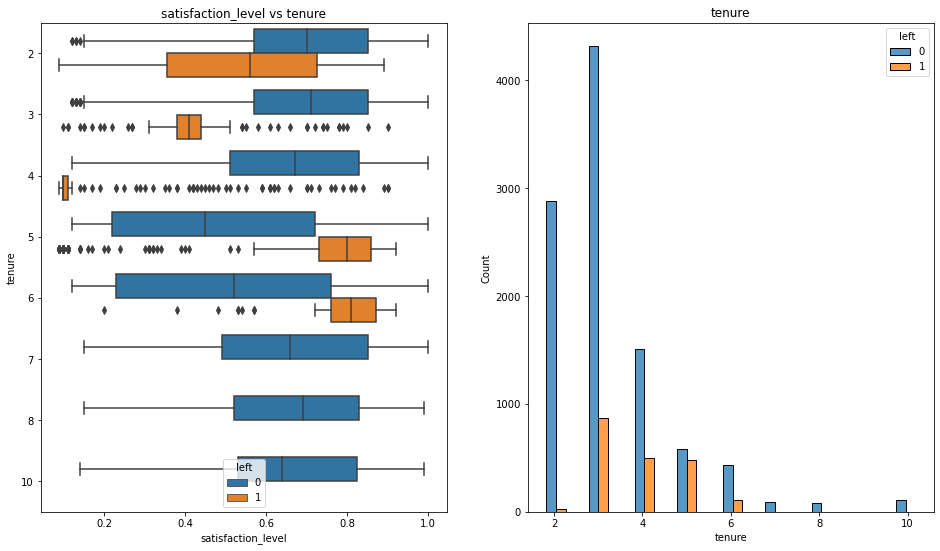

In [20]:
# Check corr of satisfaction_level vs tenure 
### YOUR CODE HERE ###
plot_data(df2, 'satisfaction_level', 'tenure', 'left', 'satisfaction_level vs tenure', 'tenure')

Tenure more than 7 years didn't leave the company. Tenure at 4 years were less satisfaction. 

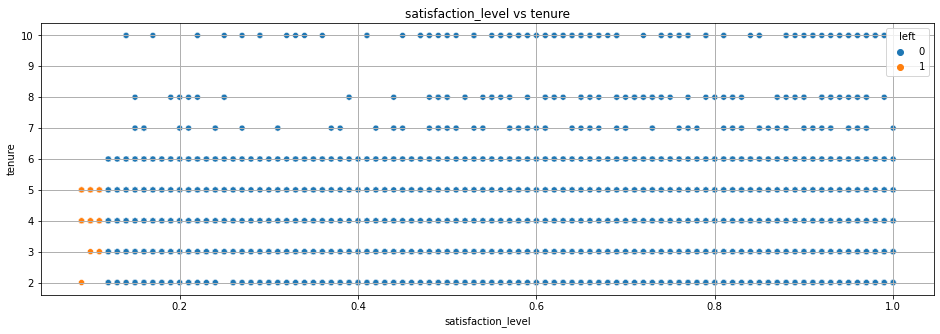

In [21]:
# Check of corr of satisfaction_level vs tenure 
plt.figure(figsize=(16,5))
sns.scatterplot(data=df2, x='satisfaction_level', y='tenure', hue='left')
plt.title("satisfaction_level vs tenure")
plt.grid(linestyle='-', linewidth=1)

Employees who had low satisfaction level had left.

In [22]:
# Check mean and median of satisfaction level the person left
### YOUR CODE HERE ###
df2.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


The employees who had left the company had less average of satisfaction than stayed. It makes sense to leave the company.

[]

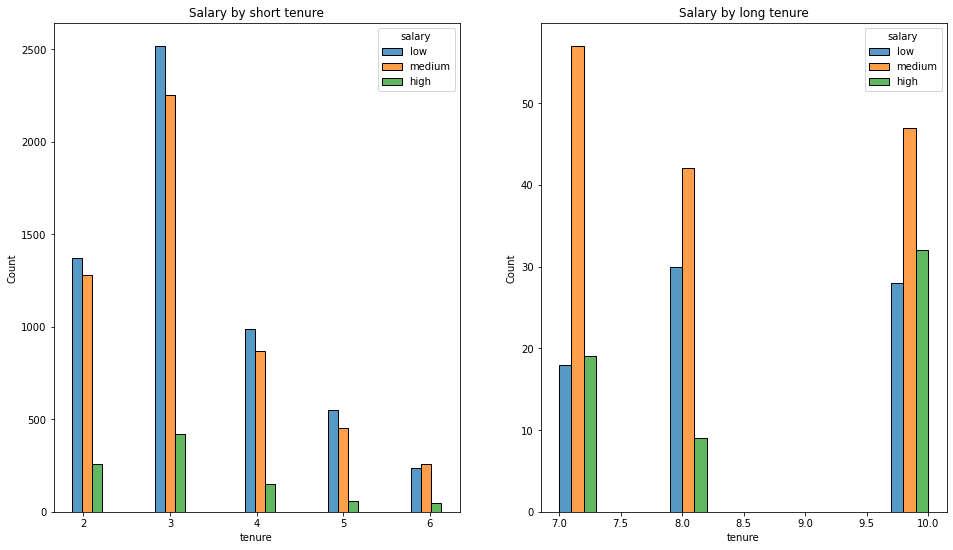

In [23]:
# Check histplot of short and long tenure by salary
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(16, 9))

tenure_short = df2[df2['tenure'] < 7]
tenure_long = df2[df2['tenure'] > 6]

sns.histplot(data=tenure_short, x='tenure', hue='salary', hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=4,  ax=ax[0])
sns.histplot(data=tenure_long, x='tenure', hue='salary',hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=1, ax=ax[1])

ax[0].set_title('Salary by short tenure')
ax[1].set_title('Salary by long tenure')
plt.plot()

The longer length of tenure doesn't refrect salary. It may be also the reason

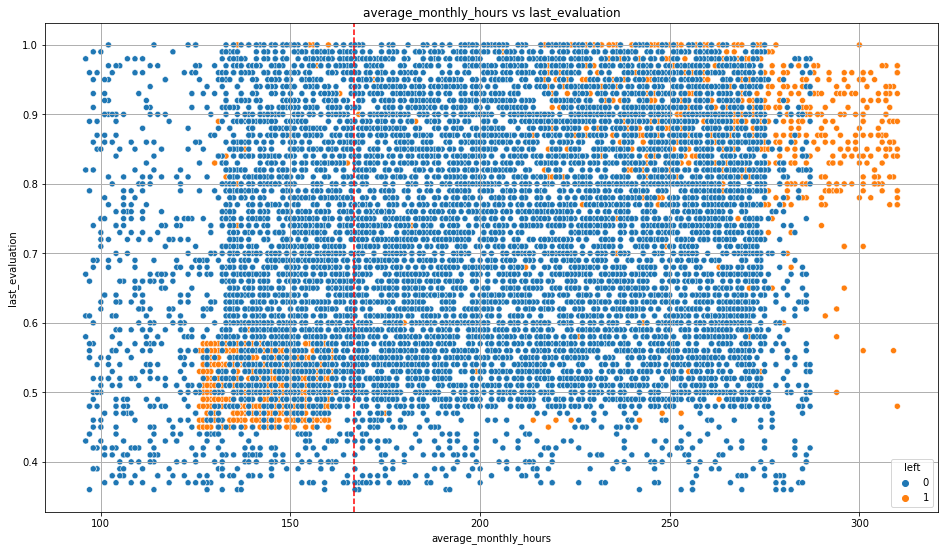

In [24]:
# Check corr of average_monthly hours vs last_evaluation
### YOUR CODE HERE ###
ave_hours = 50*40/12 # 50 weeks * 40 hours per week . 12 month
plt.figure(figsize=(16,9))
sns.scatterplot(data=df2, x='average_monthly_hours', y='last_evaluation', hue='left')
plt.axvline(x=ave_hours, color='red', ls='--')
plt.title("average_monthly_hours vs last_evaluation")
plt.grid(linestyle='-', linewidth=1)

Average monthly hours of 130-160 is low last evalution. There were possibility that they had decided to leave or received the laid off. High average monthly hours of 250-330 has high last evaluation more than 0.8, but they had left. The last evaluation might had not reflected the salary

Text(0.5, 1.0, 'average_mmonthly_hours vs promotion_last_5years')

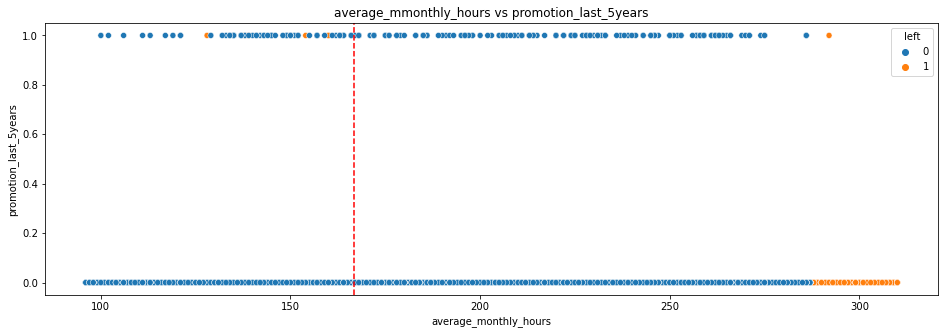

In [25]:
# Check of corr of average_monthly_hours vs promotion_last_5years
ave_hours = 50*40/12 # 50 weeks * 40 hours per week . 12 month
plt.figure(figsize=(16,5))
sns.scatterplot(data=df2, x='average_monthly_hours', y='promotion_last_5years', hue='left')
plt.axvline(x=ave_hours, color='red', ls='--')
plt.title("average_mmonthly_hours vs promotion_last_5years")

Employees who had worked at higher average monthly hours had not promoted for the past 5 years. 

Text(0.5, 1.0, 'Number of left or stayed by department')

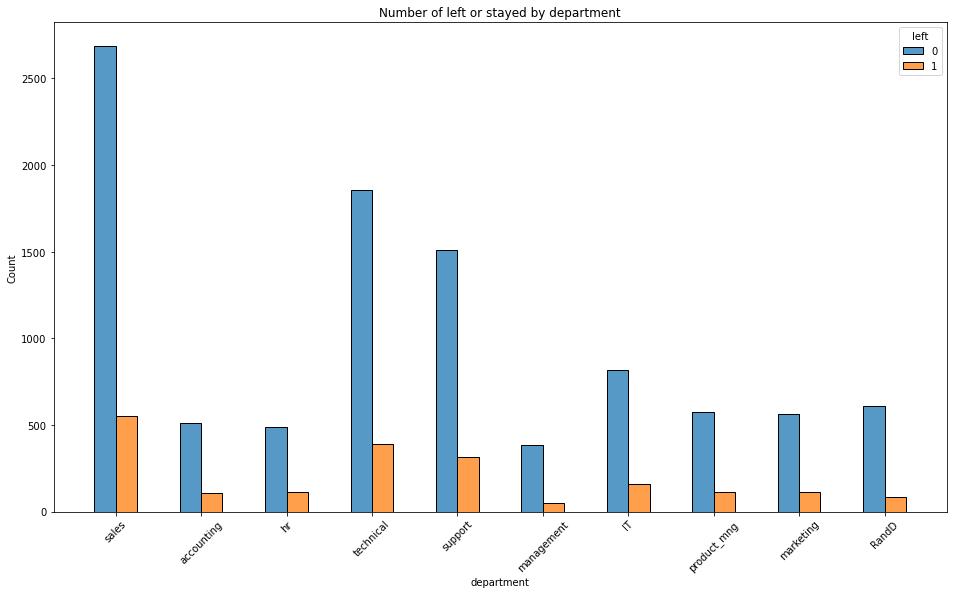

In [26]:
# Check number of left or stayed by department
plt.figure(figsize=(16,9))
sns.histplot(data=df2, x='department', hue='left', multiple='dodge', shrink=0.5)
plt.xticks(rotation='45')
plt.title("Number of left or stayed by department")

No corr of department and left.

Text(0.5, 1.0, 'Correlation Heatmap')

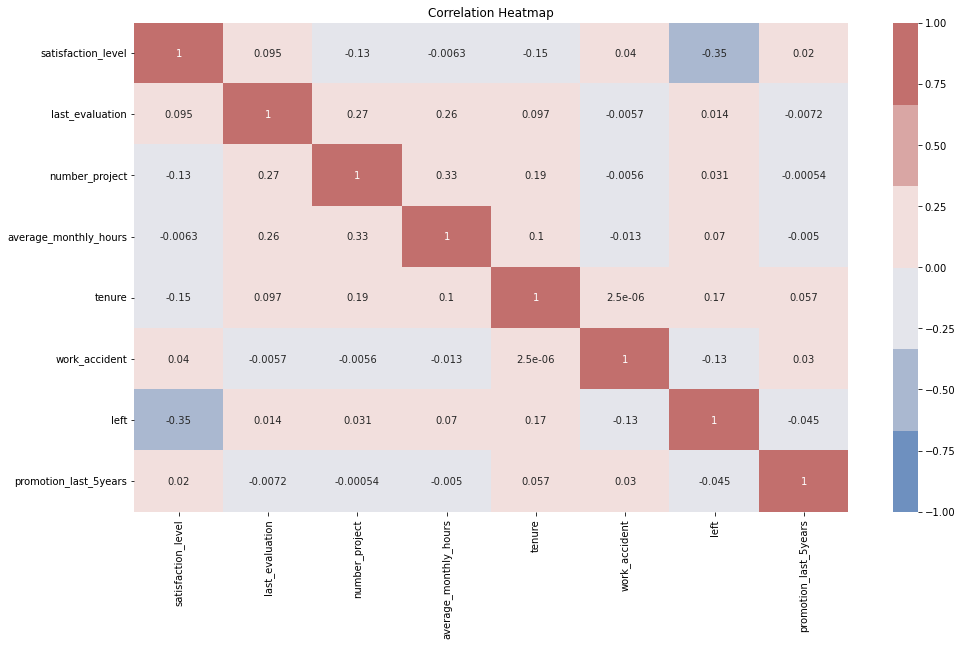

In [27]:
# Build heatmap 
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag"))
heatmap.set_title('Correlation Heatmap')

Some strong correlation of last_evaluation, mumber of project, and average month hours for tenure. Tenure has a less correlation with left. 

### Insights

What insights can you gather from the plots you created to visualize the data? 
- Low satisfaction shows high correlation to employees who had left
- High number of projects show high correlation to employees who had left
- There are high correlation between last_evaluation, number_of_project, and average month hours to employees who had left

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### Answer
- confirm model assumption
- construct the model
- evaluate the model

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Classification of "left' to 0 or 1

### Identify the types of models most appropriate for this task.

Random Forest, XGBoost

### Modeling

Add as many cells as you need to conduct the modeling process.

In [28]:
### YOUR CODE HERE ###
# Encode salary and department

df3 = pd.get_dummies(df2)

df3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   tenure                  11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   department_IT           11991 non-null  uint8  
 9   department_RandD        11991 non-null  uint8  
 10  department_accounting   11991 non-null  uint8  
 11  department_hr           11991 non-null  uint8  
 12  department_management   11991 non-null  uint8  
 13  department_marketing    11991 non-null  uint8  
 14  department_product_mng  11991 non-null

<AxesSubplot:>

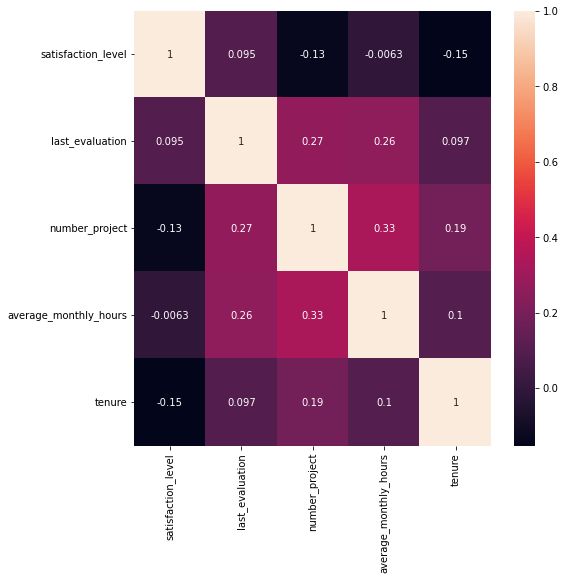

In [30]:
# Build heatmap of variables
plt.figure(figsize=(8,8))

sns.heatmap(df3[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), annot=True)

Strong correlation of last_evaluation, number_project, average_month_hours ans tenure. There are not 1 vs 1 correlation againt satisfaction_level

# Logistic Regression

In [31]:
# Remove outliers for LogisticRegression 
df_log = df3[(df3['tenure'] >= lower_threshold) & (df3['tenure'] <= upper_threshold)]

In [32]:
# Check tenure again
df_log['tenure'].describe()

count    11167.000000
mean         3.109161
std          0.899277
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: tenure, dtype: float64

In [33]:
# Target variable
y=df_log['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [34]:
# Drop target variable to select features
X = df_log.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [35]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [36]:
# Train Logistic Regression  
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [37]:
# Defined to plot the confusion matrix
def cm_plot(model, x_data, y_data):
    """
    Input:
        model: model object,
        x_data: test or validate,
        y_data: test or validate
    Output:
        Plot confusion matrix
    """
    y_pred = model.predict(x_data)
    cm=confusion_matrix(y_data, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(values_format='')
    plt.show()  

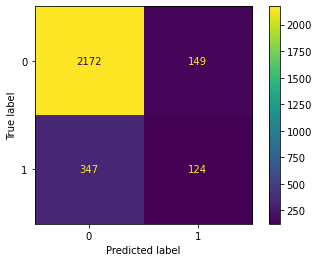

In [38]:
# Build confusion matrix by LogisticRegression
cm_plot(log_clf, X_test, y_test)

In [39]:
# Show classification report
y_pred = log_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2321
           1       0.45      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.66      0.60      0.62      2792
weighted avg       0.79      0.82      0.80      2792



In [40]:
# Make results table for Logistic Regression
def make_results_log(model_name, test_data, pred_data):
    """
    Input:
        model_name: model name
        test_data: test data
        pred_data: predicted data
    Output:
        pandas dataframe for table of score
    """    
    accuracy = accuracy_score(test_data, pred_data)
    precision = precision_score(test_data, pred_data)
    recall = recall_score(test_data, pred_data)
    f1 = f1_score(test_data, pred_data)
    roc_auc = roc_auc_score(test_data, pred_data)
    table = pd.DataFrame({'model': [model_name],
                      'precision': [precision],
                      'recall' : [recall],
                      'accuracy': [accuracy],
                      'f1': [f1],
                      'roc_auc': [roc_auc]} )
    
    return table

In [41]:
# Get score of logistic regression
results = make_results_log('Logistic Regression', y_test, y_pred)
results

,model,precision,recall,accuracy,f1,roc_auc
0,Logistic Regression,0.454212,0.26327,0.82235,0.333333,0.599537


False negative is so higher than True positive. so recall is very low

# Decision Tree base

In [42]:
# Target variable
y = df3['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [43]:
# Drop target variable to select features
X = df3.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [44]:
# Split into train, test and validate data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

In [45]:
# Hyperparameter tuning
decision_tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth': [4,6,8],
             'min_samples_leaf': [2,5],
             'min_samples_split': [2,4,6]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

decision_tree.fit(X_train, y_train)
tree = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [46]:
%%time
# Train DecistionTree
tree.fit(X_train, y_train)

CPU times: user 1.18 s, sys: 6.15 ms, total: 1.19 s
Wall time: 1.19 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'roc_auc', 'recall', 'accuracy', 'f1', 'precision'})

In [47]:
# Get best parameter of Decision Tree
tree.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [48]:
# Define to create table of scores
def make_results(model_name, model_object, metric):
    """
    Input:
        model_name: name of model
        model_object: model
        metric: metric of score
    Output:
        return DataFrame of scores
    """
    
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    metric_dict = {'roc_auc': 'mean_test_roc_auc',
           'precision': 'mean_test_precision',
           'recall': 'mean_test_recall',
           'f1': 'mean_test_f1',
           'accuracy': 'mean_test_accuracy'
          }
    
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
        
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc
    
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall' : [recall],
                          'accuracy': [accuracy],
                          'f1': [f1],
                          'roc_auc': [roc_auc]} )
    
    return table

In [49]:
# Build results 
result_table_tree = make_results('Decision Tree', tree, 'roc_auc')
results = pd.concat([results, result_table_tree], axis=0)
results

,model,precision,recall,accuracy,f1,roc_auc
0,Logistic Regression,0.454212,0.263270,0.822350,0.333333,0.599537
0,Decision Tree,0.914552,0.916949,0.971978,0.915707,0.969819


The decision tree results is better than the logistic regression above.


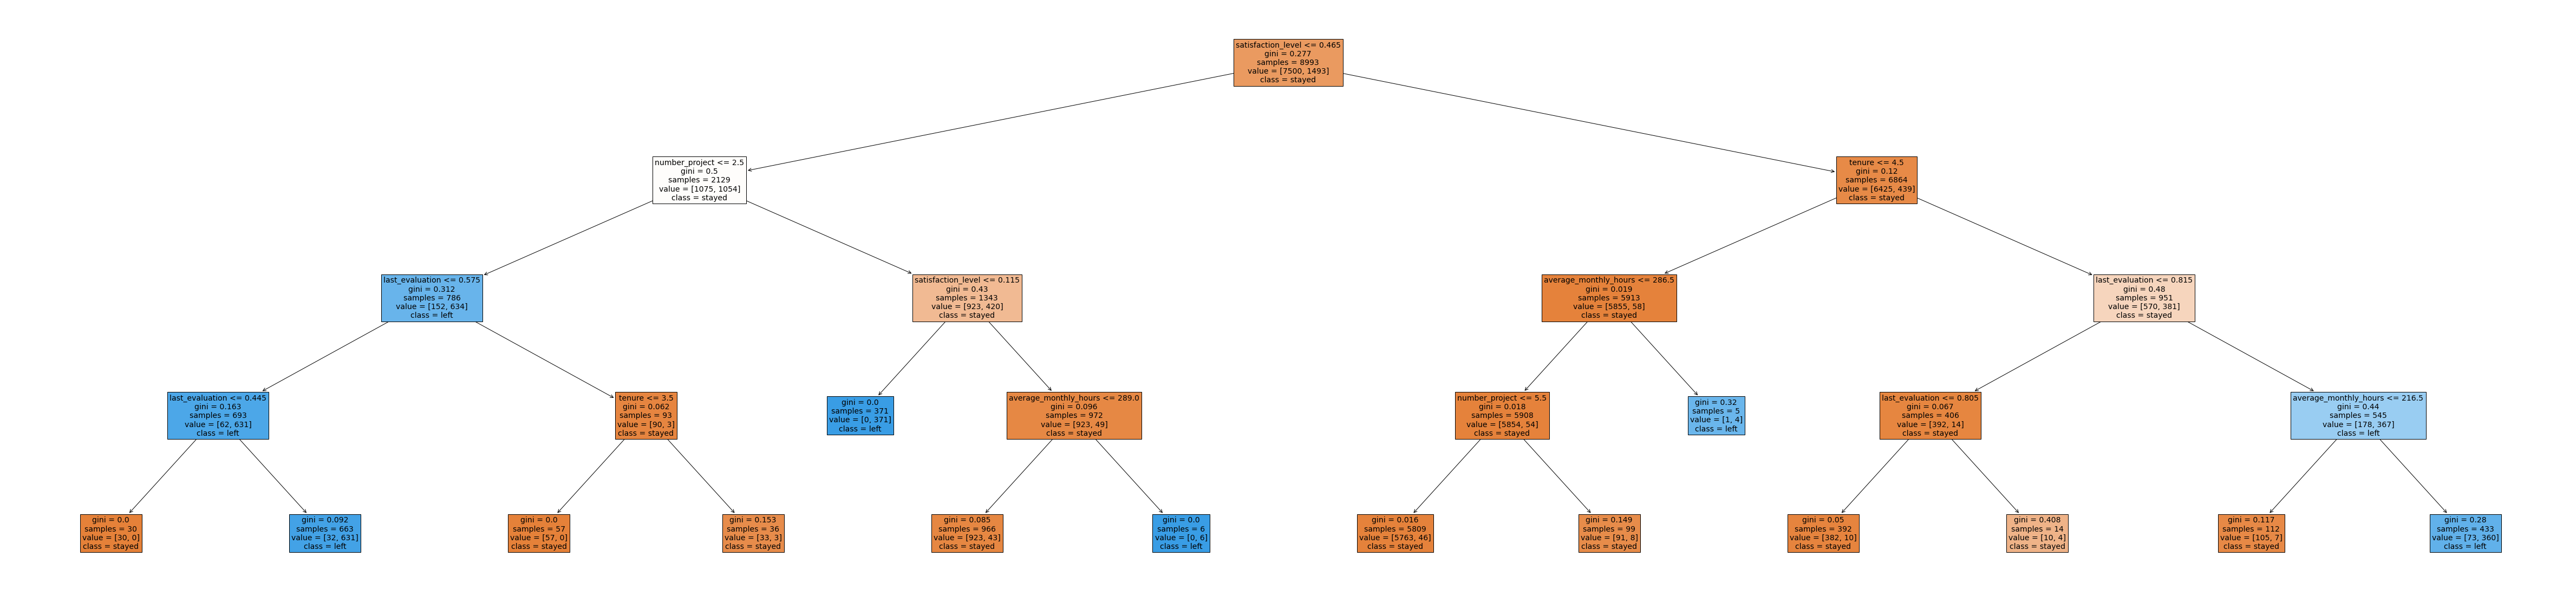

In [50]:
# Plot decision tree
plt.figure(figsize=(85,20))
plot_tree(tree.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [51]:
# Show gini_importance sorted by descending
tree_importances = pd.DataFrame(tree.best_estimator_.feature_importances_, columns=['gini_importance'], index=X.columns)

tree_importances = tree_importances.sort_values(by='gini_importance', ascending=False)

# Extract the features with importances > 0
tree_importances = tree_importances[tree_importances['gini_importance'] != 0]
tree_importances

,gini_importance
satisfaction_level,0.524622
last_evaluation,0.178501
tenure,0.120792
number_project,0.117102
average_monthly_hours,0.058983


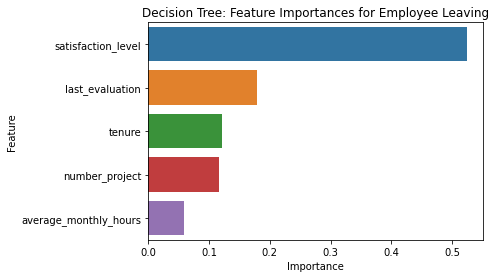

In [52]:
# Build barplot of feature importance of decision tree
sns.barplot(data=tree_importances, x="gini_importance", y=tree_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

# Rondom Forest

In [53]:
# Hyperparameter tuning
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}


scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
rf_cl = RandomForestClassifier(random_state=0)
rf_val = GridSearchCV(rf_cl, cv_params, scoring = scoring, cv=4, refit='roc_auc')

In [54]:
%%time
# Train RandomForest
rf_val.fit(X_train, y_train)

/Users/hideakinagaya/anaconda3/envs/py377_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hideakinagaya/anaconda3/envs/py377_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hideakinagaya/anaconda3/envs/py377_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hideakinagaya/anacond

/Users/hideakinagaya/anaconda3/envs/py377_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hideakinagaya/anaconda3/envs/py377_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hideakinagaya/anaconda3/envs/py377_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hideakinagaya/anacond

/Users/hideakinagaya/anaconda3/envs/py377_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hideakinagaya/anaconda3/envs/py377_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hideakinagaya/anaconda3/envs/py377_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hideakinagaya/anacond

CPU times: user 21 s, sys: 142 ms, total: 21.1 s
Wall time: 21.1 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='roc_auc',
             scoring={'roc_auc', 'recall', 'accuracy', 'f1', 'precision'})

### save model

In [55]:
# Save the pickled model in the path
path = 'capstone_prject_providing_data_driven_suggestions_for_hr'

In [56]:
# Define the write pickle
def write_pickle(path, model, save):
    '''
    Input: 
        path : path of folder 
        model: model name
        save : filename to save

    Output: 
        A call to pickle the model
    '''    

    with open(path + save + '.pickle', 'wb') as to_write:
        pickle.dump(model, to_write)

In [57]:
# Define the read pickle
def read_pickle(path, model):
    '''
    Input: 
        path : path of folder 
        model: model name

    Output: 
        pickled the model
    '''    

    with open(path + model + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model

In [58]:
# Write pickle
write_pickle(path, rf_val, 'rf')

In [59]:
# Read pickle
rf = read_pickle(path, 'rf')

In [60]:
# Check best parametors of random forest
rf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.01,
 'n_estimators': 50}

In [61]:
# check best score of random forest
rf.best_score_

0.9803243547284866

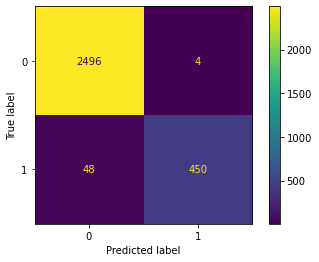

In [62]:
# Build confusion matrix by ramdom forest
cm_plot(rf, X_test, y_test)

In [63]:
# Get the scores of randam forest
result_rf = make_results('Random Forest', rf, 'roc_auc')
results = pd.concat([results, result_rf], axis=0)
results

,model,precision,recall,accuracy,f1,roc_auc
0,Logistic Regression,0.454212,0.263270,0.822350,0.333333,0.599537
0,Decision Tree,0.914552,0.916949,0.971978,0.915707,0.969819
0,Random Forest,0.982325,0.894175,0.979762,0.936173,0.980324


Random Forest results is better than Decision Tree above.

In [64]:
# Get scores with best parametors
def get_scores(model_name, model, X_test_data, y_test_data):
    """
    Input:
        model_name: model name
        model: model
        X_test_data: X test data
        y_test_data: y test data
    Output:
        pandas dataframe for table of score
    """    
    preds = model.best_estimator_.predict(X_test_data)
    
    roc_auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall' : [recall],
                          'accuracy': [accuracy],
                          'f1': [f1],
                          'roc_auc': [roc_auc]} )
    
    return table

In [65]:
# Get the score of random forest with best parametor by test data
result_rf_val = get_scores("Random Forest Val", rf, X_val, y_val)
results_rf = pd.concat([result_rf, result_rf_val], axis=0)
results_rf

,model,precision,recall,accuracy,f1,roc_auc
0,Random Forest,0.982325,0.894175,0.979762,0.936173,0.980324
0,Random Forest Val,0.993939,0.879357,0.979102,0.933144,0.939145


Random Forest Val results are almost the same as Random Forest.

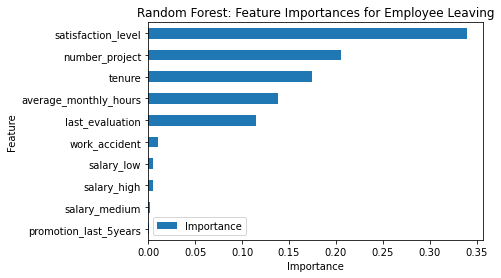

In [66]:
# Get feature importances
feat_impt = rf.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

# XGBoost

In [67]:
# Build model of XGBoost 
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 4,
                      refit = 'roc_auc'
                     )

In [68]:
%%time
# Train XGboost
xgb_cv = xgb_cv.fit(X_train, y_train)

CPU times: user 32.7 s, sys: 339 ms, total: 33 s
Wall time: 4.17 s


In [69]:
# Write pickle
write_pickle(path, xgb_cv, 'xgb')

In [70]:
# Read pickle
xgb = read_pickle(path, 'xgb')

In [71]:
# Get best parametors of XGboost
xgb.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 15,
 'subsample': 0.7}

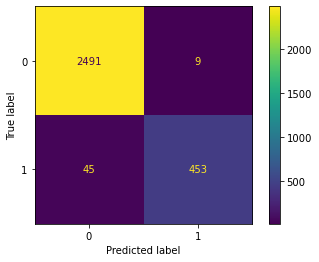

In [72]:
# Build confusion matrix by ramdom forest
cm_plot(xgb, X_test, y_test)

In [73]:
# Get score of XGboost
result_xgb = make_results('XGBoost', xgb, 'roc_auc')
results = pd.concat([results, result_xgb], axis=0)
results

,model,precision,recall,accuracy,f1,roc_auc
0,Logistic Regression,0.454212,0.263270,0.822350,0.333333,0.599537
0,Decision Tree,0.914552,0.916949,0.971978,0.915707,0.969819
0,Random Forest,0.982325,0.894175,0.979762,0.936173,0.980324
0,XGBoost,0.980525,0.909582,0.981986,0.943703,0.982502


XGBoost results is better than Random Forest above.

In [74]:
# Get the score of random forest with best parametor by test data
result_xgb_val = get_scores("XGBoost Val", xgb, X_val, y_val)
results_xgb = pd.concat([result_xgb, result_xgb_val], axis=0)
results_xgb

,model,precision,recall,accuracy,f1,roc_auc
0,XGBoost,0.980525,0.909582,0.981986,0.943703,0.982502
0,XGBoost Val,0.996997,0.890080,0.981325,0.940510,0.944774


XGBoost Val results are almost the same as XGBoost.

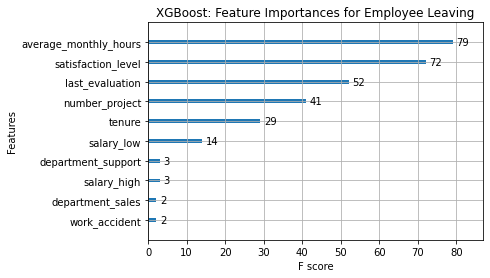

In [75]:
# Plot feature importances of XGBoost
plot_importance(xgb.best_estimator_, max_num_features=10)
plt.title("XGBoost: Feature Importances for Employee Leaving", fontsize=12)
plt.savefig('xgboost2-importance.png', dpi=400, bbox_inches = "tight")

# Kmeans

In [76]:
# Important tools for modeling and evaluation of Kmeans.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [77]:
# Scale the features and asign it to X_scaled
X_scaled = StandardScaler().fit_transform(X)

In [78]:
# Fit Kmeans and evaluate inertia for diffrent values of k

num_clusters = [i for i in range(2, 21)]

def kmeans_inertia(num_clusters, x_vals):
    """
    Input:
        num_clusters: list of number of clusters
        x_vals: scaled X vals
    Output:
        inertia
    """
    
    inertia = []
    
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    
    return inertia

In [79]:
# Get inertia with num_clusters
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

[218077.99002563066,
 203414.69198730713,
 193017.98798987956,
 182151.1612830875,
 170833.1246427716,
 159253.93890295326,
 144860.59945564574,
 132448.5967104027,
 122739.86950967887,
 115889.85521067241,
 112474.50851565516,
 98695.27033582942,
 94615.95749596885,
 92631.78916442908,
 89197.013571076,
 87397.3805800521,
 85071.86959175779,
 84227.017598142,
 83497.76141602013]

In [80]:
# Define a line plot to check elbow
def line_plot(x_vals, y_vals, y_label):
    """
    Input:
        x_vals: list of number of clusters
        y_vals: list of targets
        y_label: y label
    Output:
        Line plot
    """
    plot = sns.lineplot(x=x_vals, y=y_vals, marker='o')
    
    plot.set_xlabel('Number of clusters')
    plot.set_ylabel(y_label)
    plot.set_xticks(num_clusters)
    plot.grid(linestyle='-', linewidth=1)
    plt.show()

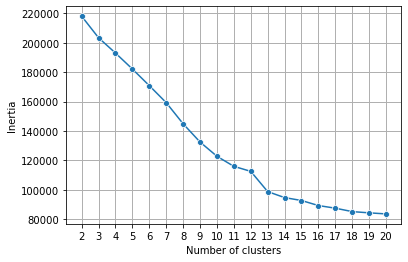

In [81]:
# Show line plot
line_plot(num_clusters, inertia, 'Inertia')

The plot seems to depict an elbow at 9 clusters. Next the silhouette scores should be checked

In [82]:
# Define to evaluate silhouette score

def kmeans_sil(num_clusters, x_vals):
    """
    Input:
        num_clusters: list of number of clusters
        x_vals: scaled X vals
    Output:
        sil_score: list of silhouette score
    """    
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    return sil_score

In [83]:
# Get silhouette score
sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

[0.10247872911995375,
 0.12341315265146223,
 0.1425536742377249,
 0.16079263492865342,
 0.17362476674485036,
 0.19094282020732625,
 0.23761123500429598,
 0.25766172495982487,
 0.2655573677851239,
 0.25787769205500966,
 0.2519808743640529,
 0.2671783135781749,
 0.27616463277000725,
 0.2696808354359241,
 0.2780422075054973,
 0.2698681301330454,
 0.27469983449910856,
 0.2543030926939438,
 0.2703336904062428]

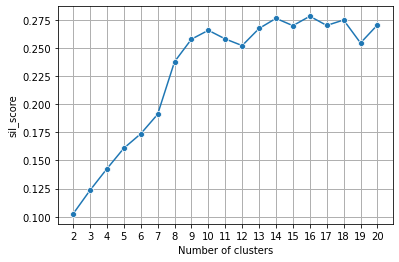

In [84]:
# Show line plot
line_plot(num_clusters, sil_score, 'sil_score')

The plot indicates that the silhouette score is not closest to 1. 

# Need to update from here

# Feature Engineering

So far the results of AOC for Decision Tree, Random Forest and XGBoost were over 95%. It may case data leakage.

After the analyze phase, employees with over 250 hours/month, satisfacation level under 0.2 and last last evaluation results over 0.8 can be dropped. 

In [85]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [86]:
df2.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [87]:
# Create filter to drop
filter_drop = (df2['last_evaluation']>=0.8) & (df2['satisfaction_level'] <0.2) & (df2['average_monthly_hours'] >=250)
df2[filter_drop].value_counts()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  tenure  work_accident  left  promotion_last_5years  department  salary
0.19                0.97             6               269                    6       0              0     0                      hr          medium    1
0.10                0.85             7               259                    4       0              1     0                      technical   low       1
                                                     279                    4       0              1     0                      RandD       medium    1
                                                     310                    5       0              1     0                      marketing   low       1
                    0.86             5               253                    4       0              1     0                      technical   low       1
                                                                                             

In [88]:
# Drop with feature engineering
df4 = df2.drop(df2.index[filter_drop], axis=0)

In [89]:
# Feature eigineering to categorize overworked or not
df4['overworked'] = df4['average_monthly_hours']

print('max hours', df4['overworked'].max())
print('min hours', df4['overworked'].min())

max hours 310
min hours 96


In [90]:
# Categorized if average monthly hours is over 175
df4['overworked'] = (df4['overworked'] > 175).astype(int)
df4['overworked'].head()

0    0
1    1
3    1
4    0
5    0
Name: overworked, dtype: int64

In [91]:
# Drop average monthly hours after the feature engineering
df4 = df4.drop('average_monthly_hours', axis=1)
df4.head()

,satisfaction_level,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,department,salary,overworked
0,0.38,0.53,2,3,0,1,0,sales,low,0
1,0.80,0.86,5,6,0,1,0,sales,medium,1
3,0.72,0.87,5,5,0,1,0,sales,low,1
4,0.37,0.52,2,3,0,1,0,sales,low,0
5,0.41,0.50,2,3,0,1,0,sales,low,0


In [92]:
# Encode salary and department
df5 = pd.get_dummies(df4)

In [93]:
df5.head()

,satisfaction_level,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,overworked,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5,0.41,0.50,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [94]:
# Target variable
y = df5['left']
# Drop target variable to select features
X = df5.drop('left', axis=1)

In [95]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

# Logistic Regression2

In [96]:
# Train Logistic Regression  
log_clf2 = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

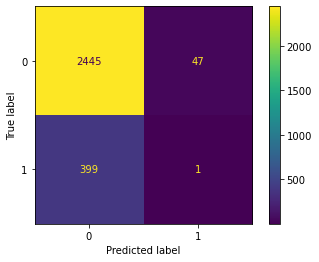

In [97]:
# Build confusion matrix by LogisticRegression
cm_plot(log_clf2, X_test, y_test)

In [98]:
# Show classification report
y_pred = log_clf2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2492
           1       0.02      0.00      0.00       400

    accuracy                           0.85      2892
   macro avg       0.44      0.49      0.46      2892
weighted avg       0.74      0.85      0.79      2892



In [99]:
# Get score of logistic regression
lr2 = make_results_log('Logistic Regression2', y_test, y_pred)
results = pd.concat([results, lr2], axis=0)
results

,model,precision,recall,accuracy,f1,roc_auc
0,Logistic Regression,0.454212,0.263270,0.822350,0.333333,0.599537
0,Decision Tree,0.914552,0.916949,0.971978,0.915707,0.969819
0,Random Forest,0.982325,0.894175,0.979762,0.936173,0.980324
0,XGBoost,0.980525,0.909582,0.981986,0.943703,0.982502
0,Logistic Regression2,0.020833,0.002500,0.845781,0.004464,0.491820


AUC resluts is 49% which is lower than before feature engineering

# Decision_tree2

In [100]:
# Split into train, test and validate data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

In [101]:
# Hyperparameter tuning
decision_tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth': [4,6,8],
             'min_samples_leaf': [2,5],
             'min_samples_split': [2,4,6]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

decision_tree.fit(X_train, y_train)
tree2 = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [102]:
%%time
# Train DecistionTree
tree2.fit(X_train, y_train)

CPU times: user 1.16 s, sys: 37.3 ms, total: 1.2 s
Wall time: 1.1 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'roc_auc', 'recall', 'accuracy', 'f1', 'precision'})

In [103]:
# Get best parameter of Decision Tree
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

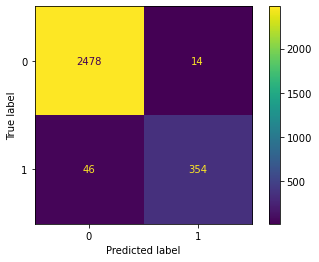

In [104]:
# Build confusion matrix by DecisionTree
cm_plot(tree2, X_test, y_test)

In [105]:
# Build results 
result_table_tree2 = make_results('Decision Tree2', tree2, 'roc_auc')
results = pd.concat([results, result_table_tree2], axis=0)
results

,model,precision,recall,accuracy,f1,roc_auc
0,Logistic Regression,0.454212,0.263270,0.822350,0.333333,0.599537
0,Decision Tree,0.914552,0.916949,0.971978,0.915707,0.969819
0,Random Forest,0.982325,0.894175,0.979762,0.936173,0.980324
0,XGBoost,0.980525,0.909582,0.981986,0.943703,0.982502
0,Logistic Regression2,0.020833,0.002500,0.845781,0.004464,0.491820
0,Decision Tree2,0.942837,0.888986,0.977171,0.914958,0.959795


Some scores fell than before the feature enginnering of Decision Tree. It is expected


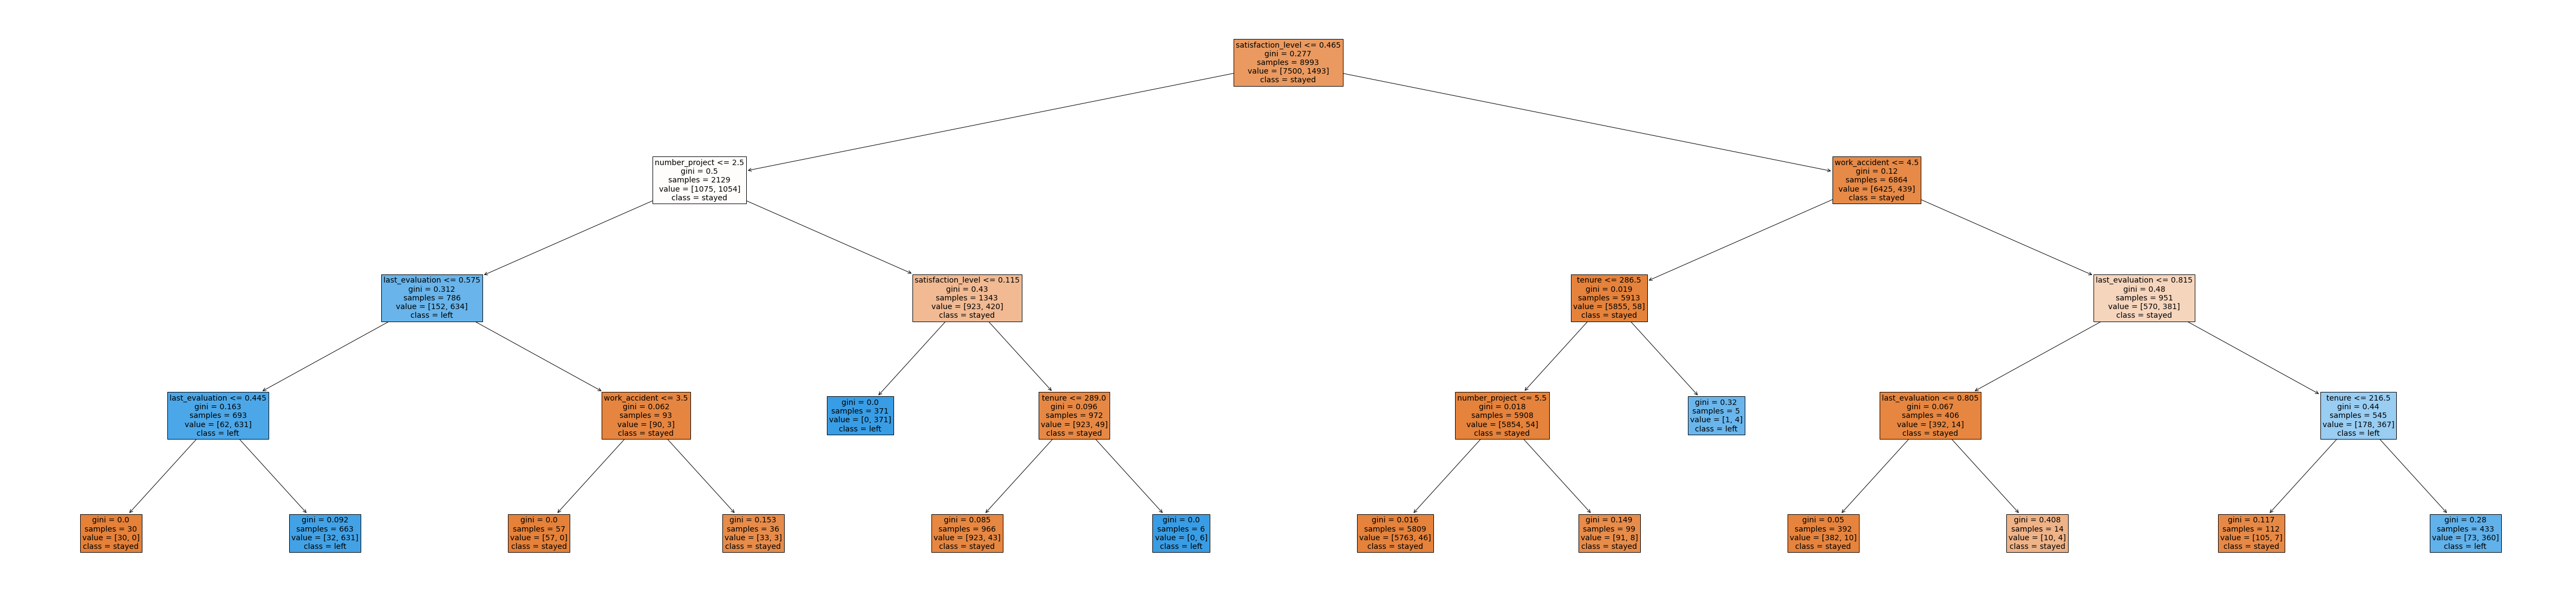

In [106]:
# Plot decision tree
plt.figure(figsize=(85,20))
plot_tree(tree.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [107]:
# Show gini_importance sorted by descending
tree_importances2 = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=['gini_importance'], index=X.columns)

tree_importances2 = tree_importances2.sort_values(by='gini_importance', ascending=False)

# Extract the features with importances > 0
tree_importances2 = tree_importances2[tree_importances2['gini_importance'] != 0]
tree_importances2

,gini_importance
satisfaction_level,0.402503
number_project,0.258802
last_evaluation,0.188967
tenure,0.128457
overworked,0.020797
department_technical,0.000240
department_RandD,0.000189
salary_low,0.000045


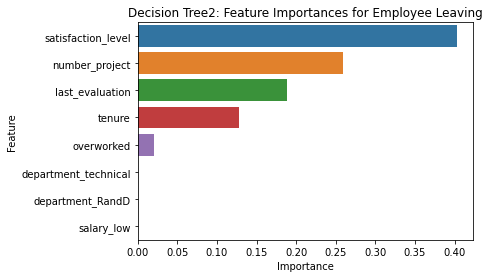

In [108]:
# Build barplot of feature importance of decision tree
sns.barplot(data=tree_importances2, x="gini_importance", y=tree_importances2.index, orient='h')
plt.title("Decision Tree2: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

# Random forest2

In [109]:
# Hyperparameter tuning
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}


scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
rf2_cl = RandomForestClassifier(random_state=0)
rf_val2 = GridSearchCV(rf2_cl, cv_params, scoring = scoring, cv=4, refit='roc_auc')

In [110]:
%%time
# Train RandomForest
rf_val2.fit(X_train, y_train)

/Users/hideakinagaya/anaconda3/envs/py377_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hideakinagaya/anaconda3/envs/py377_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hideakinagaya/anaconda3/envs/py377_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hideakinagaya/anacond

/Users/hideakinagaya/anaconda3/envs/py377_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hideakinagaya/anaconda3/envs/py377_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hideakinagaya/anaconda3/envs/py377_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hideakinagaya/anacond

/Users/hideakinagaya/anaconda3/envs/py377_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hideakinagaya/anaconda3/envs/py377_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hideakinagaya/anaconda3/envs/py377_ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hideakinagaya/anacond

CPU times: user 20 s, sys: 176 ms, total: 20.2 s
Wall time: 20.2 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='roc_auc',
             scoring={'roc_auc', 'recall', 'accuracy', 'f1', 'precision'})

### save model

In [111]:
# Save the pickled model in the path
path = '/Users/hideakinagaya/PycharmProjects/python_programming/capstone_prject_providing_data_driven_suggestions_for_hr'

In [112]:
# Define the write pickle
def write_pickle(path, model, save):
    '''
    Input: 
        path : path of folder 
        model: model name
        save : filename to save

    Output: 
        A call to pickle the model
    '''    

    with open(path + save + '.pickle', 'wb') as to_write:
        pickle.dump(model, to_write)

In [113]:
# Define the read pickle
def read_pickle(path, model):
    '''
    Input: 
        path : path of folder 
        model: model name

    Output: 
        pickled the model
    '''    

    with open(path + model + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model

In [114]:
# Write pickle
write_pickle(path, rf_val2, 'rf2')

In [115]:
# Read pickle
rf2 = read_pickle(path, 'rf2')

In [116]:
# Check best parametors of random forest
rf2.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 0.01,
 'n_estimators': 100}

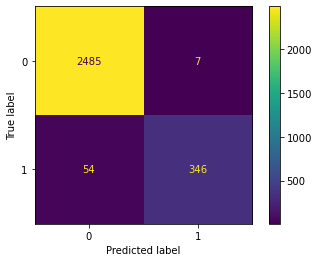

In [117]:
# Build confusion matrix by ramdom forest
cm_plot(rf2, X_test, y_test)

In [118]:
# Get the scores of randam forest
result_rf2 = make_results('Random Forest2', rf2, 'roc_auc')
results = pd.concat([results, result_rf2], axis=0)
results

,model,precision,recall,accuracy,f1,roc_auc
0,Logistic Regression,0.454212,0.263270,0.822350,0.333333,0.599537
0,Decision Tree,0.914552,0.916949,0.971978,0.915707,0.969819
0,Random Forest,0.982325,0.894175,0.979762,0.936173,0.980324
0,XGBoost,0.980525,0.909582,0.981986,0.943703,0.982502
0,Logistic Regression2,0.020833,0.002500,0.845781,0.004464,0.491820
0,Decision Tree2,0.942837,0.888986,0.977171,0.914958,0.959795
0,Random Forest2,0.971262,0.859755,0.977055,0.911907,0.971414


Some scores fell than before the feature enginnering of Random Forest. It is expected

In [119]:
# Get the score of random forest with best parametor by test data
result_rf_val2 = get_scores("Random Forest2 Val", rf2, X_val, y_val)
results_rf2 = pd.concat([result_rf2, result_rf_val2], axis=0)
results_rf2

,model,precision,recall,accuracy,f1,roc_auc
0,Random Forest2,0.971262,0.859755,0.977055,0.911907,0.971414
0,Random Forest2 Val,0.973384,0.853333,0.976487,0.909414,0.924794


Random Forest Test2 results are almost the same as Random Forest2.

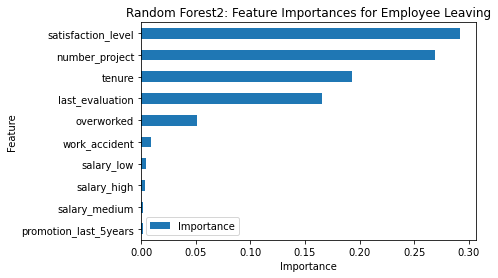

In [120]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest2: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()
# plt.savefig('rf2-importance.png', dpi=400, bbox_inches = "tight")

# XGBoost2

In [121]:
# Build model of XGBoost 
xgb2 = XGBClassifier(objective='binary:logistic', random_state=0)

cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

xgb_cv2 = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 4,
                      refit = 'roc_auc'
                     )

In [122]:
%%time
# Train XGboost
xgb_cv2 = xgb_cv.fit(X_train, y_train)

CPU times: user 33.8 s, sys: 919 ms, total: 34.8 s
Wall time: 4.67 s


In [123]:
# Write pickle
write_pickle(path, xgb_cv2, 'xgb2')

In [124]:
# Read pickle
xgb2 = read_pickle(path, 'xgb2')

In [125]:
# Get best parametors of XGboost
xgb2.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 15,
 'subsample': 0.7}

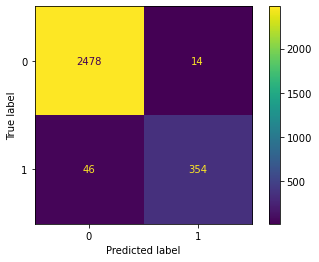

In [126]:
# Build confusion matrix by ramdom forest
cm_plot(xgb2, X_test, y_test)

In [127]:
# Get score of XGboost
result_xgb2 = make_results('XGBoost2', xgb2, 'roc_auc')
results = pd.concat([results, result_xgb2], axis=0)
results

,model,precision,recall,accuracy,f1,roc_auc
0,Logistic Regression,0.454212,0.263270,0.822350,0.333333,0.599537
0,Decision Tree,0.914552,0.916949,0.971978,0.915707,0.969819
0,Random Forest,0.982325,0.894175,0.979762,0.936173,0.980324
0,XGBoost,0.980525,0.909582,0.981986,0.943703,0.982502
0,Logistic Regression2,0.020833,0.002500,0.845781,0.004464,0.491820
0,Decision Tree2,0.942837,0.888986,0.977171,0.914958,0.959795
0,Random Forest2,0.971262,0.859755,0.977055,0.911907,0.971414
0,XGBoost2,0.955955,0.885641,0.978554,0.919423,0.974786


Some scores fell than before the feature enginnering of XGBoost. It is expected

In [128]:
# Get the score of random forest with best parametor by test data
result_xgb_val2 = get_scores("XGBoost2 Val", xgb2, X_val, y_val)
results_xgb2 = pd.concat([result_xgb2, result_xgb_val2], axis=0)
results_xgb2

,model,precision,recall,accuracy,f1,roc_auc
0,XGBoost2,0.955955,0.885641,0.978554,0.919423,0.974786
0,XGBoost2 Val,0.952381,0.866667,0.975565,0.907504,0.929856


XGBoost Val2 results are almost the same as XGBoost2.

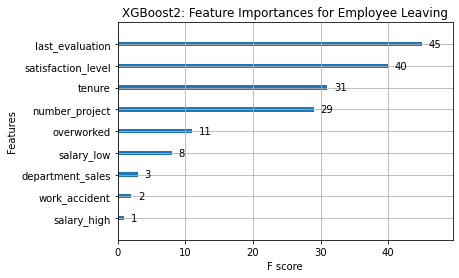

In [129]:
# Plot feature importances of XGBoost
plot_importance(xgb2.best_estimator_, max_num_features=10)
plt.title("XGBoost2: Feature Importances for Employee Leaving", fontsize=12)
plt.savefig('xgboost2-importance.png', dpi=400, bbox_inches = "tight")

# K means model2

In [130]:
# Scale the features and asign it to X_scaled
X_scaled = StandardScaler().fit_transform(X)

In [131]:
# Fit Kmeans and evaluate inertia for diffrent values of k

num_clusters = [i for i in range(2, 31)]

def kmeans_inertia(num_clusters, x_vals):
    """
    Input:
        num_clusters: list of number of clusters
        x_vals: scaled X vals
    Output:
        inertia
    """
    
    inertia = []
    
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    
    return inertia

In [132]:
# Get inertia with num_clusters
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

[210380.8677267822,
 199143.71854582735,
 188132.34764676864,
 175769.20717442056,
 166558.3573313899,
 153637.1331300811,
 140174.136396192,
 127739.75802962971,
 120947.5349878585,
 112666.2269516195,
 100484.08895377754,
 96647.98275876995,
 92043.32657565447,
 89609.2261678414,
 86900.11581006236,
 84637.90075564773,
 83698.15048960187,
 81662.34221901085,
 80795.05573882023,
 79671.47796088076,
 78909.4858142228,
 77547.74313693882,
 76308.91240257496,
 75385.07510205718,
 73751.29835253042,
 73127.85942757505,
 72280.75580588753,
 71295.94463813545,
 70101.36797460914]

In [133]:
# Define to create a line plot to check elbow
def line_plot(x_vals, y_vals, y_label):
    """
    Input:
        x_vals: list of number of clusters
        y_vals: list of targets
        y_label: y label
    Output:
        Line plot
    """
    plt.figure(figsize=(12,6))
    plot = sns.lineplot(x=x_vals, y=y_vals, marker='o')
    
    plot.set_xlabel('Number of clusters')
    plot.set_ylabel(y_label)
    plot.set_xticks(num_clusters)
    plot.grid(linestyle='-', linewidth=1)
    plt.show()

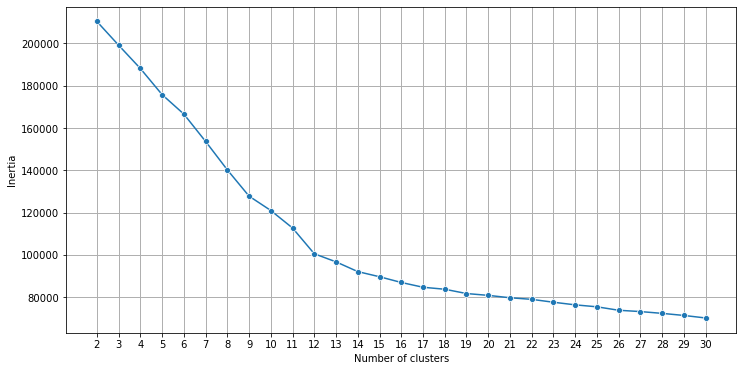

In [134]:
# Show line plot
line_plot(num_clusters, inertia, 'Inertia')

The plot seems to depict an elbow at 12 clusters. Next the silhouette scores should be checked

In [135]:
# Define to evaluate silhouette score

def kmeans_sil(num_clusters, x_vals):
    """
    Input:
        num_clusters: list of number of clusters
        x_vals: scaled X vals
    Output:
        sil_score: list of silhouette score
    """    
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    return sil_score

In [ ]:
# Get silhouette score
sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

In [ ]:
# Show line plot
line_plot(num_clusters, sil_score, 'sil_score')

The plot indicates that the silhouette score is not closest to 1. 

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

In [ ]:
# Trained model Metric
results.iloc[:4, :]

In [ ]:
# Trained model Metric with Feature Engineering
results.iloc[4:, :]

In [ ]:
# Random Forest Feature Importance with Feature Engineering
sns.barplot(data=tree_importances2, x="gini_importance", y=tree_importances2.index, orient='h')
plt.title("Decision Tree2: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

In [ ]:
# XGBoost Feature Importance with Feature Engineering
plot_importance(xgb2.best_estimator_, max_num_features=10)
plt.title("XGBoost2: Feature Importances for Employee Leaving", fontsize=12)
# plt.savefig('xgboost2-importance.png', dpi=400, bbox_inches = "tight")

### Conclusion, Recommendations, Next Steps

Due to the possibility of data leakeage, model with feature engineering can be used
- The most accuracy model is XGBoost. precision: 95.6%,	recall: 88.6%, accuracy: 97.9%, f1:	91.9%, AUC: 97.5%.
- The model of Random Forest and XGBoost show the feature importances for employee leaving:
    - last_evaluation
    - satisfaction_level
    - tenure
    - number_project
    - overworked

Recommendations
- Reduce the monthly working hours for employees
- Reduce the number of projects 
- Improve the method of promotion vs evaluation
- Conduct the investigation why 4 years tenured employees are low satisfaction

Next Steps
- Employee survey to find out low satisfaction scores
- Lower working hours and the number of projects
- Improve the evaluation method and process 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.